In [174]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
pd.set_option('display.max_columns', 100)
df = pd.read_csv("data/2sec/son.csv")
df.head()

,Unnamed: 0,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature40,feature41,feature42,feature43,feature44,feature45,feature46,feature47,feature48,feature49,feature50,feature51,feature52,feature53,feature54,feature55,feature56,feature57,feature58,feature59,feature60,feature61,feature62,feature63,feature64,feature65,feature66,feature67,feature68,feature69,feature70,target
0,bb0,-0.014820,0.014216,0.039513,1.340054,-0.008300,3.002947,1.416113,3.850002,7.900615,1.167044,3.628873,7.679487,0.713763,3.135451,6.995949,0.947572,-0.999765,0.248141,0.034036,0.001361,3.514306,0.885473,3.968848,12799.963511,7416.027670,0.464690,0.064890,1.336384,0.641829,3.269843,1.497715,3.960564,8.006118,1.358203,3.773885,7.820291,1.096454,3.316703,7.233734,0.030227,0.116984,0.393311,0.058571,0.207506,0.477891,78098.979147,111.817885,698.448008,0.052335,0.165324,380.593277,1.822267,3.623863,195.105302,39976.935836,0.000383,0.000383,0.941320,0.000065,0.000065,0.721490,0.000033,0.000033,0.429724,-1.000000,0.999977,0.999977,0.999977,0.000023,0.000023,0.000023,blanc
1,bb1,-0.014408,0.014926,-0.060990,1.341423,-0.008581,3.007771,1.402782,3.835586,7.885825,1.151080,3.612565,7.662839,0.700385,3.096035,7.021223,0.917743,-0.978922,0.228526,0.025941,0.000816,3.177219,0.886980,3.582065,12785.924936,7392.561989,0.461859,0.107513,1.342913,0.626664,3.226004,1.620754,4.099853,8.145885,1.468938,3.914325,7.962569,1.089894,3.462346,7.335734,0.023810,0.094898,0.330816,0.046803,0.170249,0.444036,78229.873895,111.468339,701.812503,0.051633,0.164220,381.000518,1.828749,3.646055,195.463318,40074.924922,0.000383,0.000383,0.931753,0.000065,0.000065,0.714579,0.000033,0.000033,0.425500,-0.999995,0.999977,0.999977,0.999977,0.000023,0.000023,0.000023,blanc
2,bb10,-0.014682,0.014129,-0.100752,1.340755,0.007197,3.012429,1.429754,3.861467,7.912228,1.178520,3.638971,7.690757,0.721806,3.138616,7.104310,0.935355,-0.998393,0.251338,0.036213,0.001973,3.164759,0.886214,3.571099,12793.919236,7376.883211,0.463279,-0.070833,1.341695,0.613631,3.170441,1.630134,4.111340,8.156764,1.480656,3.929137,7.975376,1.108255,3.481219,7.314749,0.024444,0.095533,0.331429,0.047528,0.173605,0.441746,78163.797282,111.630364,700.201938,0.051808,0.164550,380.799459,1.827677,3.642877,195.275790,40023.592706,0.000383,0.000383,0.939192,0.000065,0.000065,0.718896,0.000033,0.000033,0.427391,-1.000000,0.999977,0.999977,0.999977,0.000023,0.000023,0.000023,blanc
3,bb11,-0.012885,0.015948,0.052444,1.337816,0.009798,3.003014,1.426662,3.860672,7.910302,1.214466,3.638705,7.689415,0.832884,3.145692,7.075344,0.883265,-0.994994,0.209853,0.017834,0.000476,3.120643,0.886464,3.520325,12827.551925,7382.922480,0.462801,-0.066097,1.341711,0.653689,3.316861,1.644235,4.126359,8.172719,1.484922,3.936172,7.983209,1.088432,3.483047,7.357029,0.022744,0.092018,0.320635,0.044444,0.167937,0.434694,78185.680035,111.315677,702.377977,0.051823,0.164811,380.942038,1.829591,3.649720,195.223403,40009.187292,0.000383,0.000383,0.933514,0.000065,0.000065,0.713721,0.000033,0.000033,0.424314,-1.000000,0.999977,0.999977,0.999977,0.000023,0.000023,0.000023,blanc
4,bb12,-0.016086,0.014593,0.081232,1.344007,-0.000393,3.003154,1.350907,3.771681,7.821177,1.102014,3.549270,7.599201,0.674595,3.052773,7.012749,0.944462,-0.967122,0.240045,0.029637,0.001224,3.555806,0.885226,4.016835,12827.177079,7427.799887,0.465163,-0.061653,1.338056,0.637527,3.273791,1.482448,3.946019,7.991667,1.343881,3.760257,7.807256,1.093031,3.310199,7.194871,0.031111,0.121927,0.398980,0.059864,0.213243,0.479728,78076.829259,112.240165,695.622901,0.052098,0.164955,380.417462,1.824807,3.631956,195.206300,40004.542244,0.000383,0.000383,0.940803,0.000065,

In [175]:
print( df.isna().sum().sort_values(ascending=False))

feature27     13
feature24     13
feature26     13
Unnamed: 0     0
feature51      0
              ..
feature31      0
feature32      0
feature33      0
feature34      0
target         0
Length: 73, dtype: int64


In [182]:
df.reset_index()

,index,Unnamed: 0,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature25,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature40,feature41,feature42,feature43,feature44,feature45,feature46,feature47,feature48,feature49,feature50,feature51,feature52,feature53,feature54,feature55,feature56,feature57,feature58,feature59,feature60,feature61,feature62,feature63,feature64,feature65,feature66,feature67,feature68,feature69,feature70,target
0,0,bb0,-0.014820,0.014216,3.951329e-02,1.340054,-8.299519e-03,3.002947,1.416113,3.850002,7.900615,1.167044,3.628873,7.679487,0.713763,3.135451,6.995949,0.947572,-0.999765,0.248141,0.034036,0.001361,3.514306,0.885473,3.968848,12799.963511,0.464690,0.641829,3.269843,1.497715,3.960564,8.006118,1.358203,3.773885,7.820291,1.096454,3.316703,7.233734,0.030227,0.116984,0.393311,0.058571,0.207506,0.477891,78098.979147,111.817885,698.448008,0.052335,0.165324,380.593277,1.822267,3.623863,195.105302,39976.935836,0.000383,0.000383,0.941320,0.000065,0.000065,0.721490,0.000033,0.000033,0.429724,-1.000000,0.999977,0.999977,0.999977,0.000023,0.000023,0.000023,blanc
1,1,bb1,-0.014408,0.014926,-6.099034e-02,1.341423,-8.580874e-03,3.007771,1.402782,3.835586,7.885825,1.151080,3.612565,7.662839,0.700385,3.096035,7.021223,0.917743,-0.978922,0.228526,0.025941,0.000816,3.177219,0.886980,3.582065,12785.924936,0.461859,0.626664,3.226004,1.620754,4.099853,8.145885,1.468938,3.914325,7.962569,1.089894,3.462346,7.335734,0.023810,0.094898,0.330816,0.046803,0.170249,0.444036,78229.873895,111.468339,701.812503,0.051633,0.164220,381.000518,1.828749,3.646055,195.463318,40074.924922,0.000383,0.000383,0.931753,0.000065,0.000065,0.714579,0.000033,0.000033,0.425500,-0.999995,0.999977,0.999977,0.999977,0.000023,0.000023,0.000023,blanc
2,2,bb10,-0.014682,0.014129,-1.007518e-01,1.340755,7.197458e-03,3.012429,1.429754,3.861467,7.912228,1.178520,3.638971,7.690757,0.721806,3.138616,7.104310,0.935355,-0.998393,0.251338,0.036213,0.001973,3.164759,0.886214,3.571099,12793.919236,0.463279,0.613631,3.170441,1.630134,4.111340,8.156764,1.480656,3.929137,7.975376,1.108255,3.481219,7.314749,0.024444,0.095533,0.331429,0.047528,0.173605,0.441746,78163.797282,111.630364,700.201938,0.051808,0.164550,380.799459,1.827677,3.642877,195.275790,40023.592706,0.000383,0.000383,0.939192,0.000065,0.000065,0.718896,0.000033,0.000033,0.427391,-1.000000,0.999977,0.999977,0.999977,0.000023,0.000023,0.000023,blanc
3,3,bb11,-0.012885,0.015948,5.244423e-02,1.337816,9.797548e-03,3.003014,1.426662,3.860672,7.910302,1.214466,3.638705,7.689415,0.832884,3.145692,7.075344,0.883265,-0.994994,0.209853,0.017834,0.000476,3.120643,0.886464,3.520325,12827.551925,0.462801,0.653689,3.316861,1.644235,4.126359,8.172719,1.484922,3.936172,7.983209,1.088432,3.483047,7.357029,0.022744,0.092018,0.320635,0.044444,0.167937,0.434694,78185.680035,111.315677,702.377977,0.051823,0.164811,380.942038,1.829591,3.649720,195.223403,40009.187292,0.000383,0.000383,0.933514,0.000065,0.000065,0.713721,0.000033,0.000033,0.424314,-1.000000,0.999977,0.999977,0.999977,0.000023,0.000023,0.000023,blanc
4,4,bb12,-0.016086,0.014593,8.123223e-02,1.344007,-3.927875e-04,3.003154,1.350907,3.771681,7.821177,1.102014,3.549270,7.599201,0.674595,3.052773,7.012749,0.944462,-0.967122,0.240045,0.029637,0.001224,3.555806,0.885226,4.016835,12827.177079,0.465163,0.637527,3.273791,1.482448,3.946019,7.991667,1.343881,3.760257,7.807256,1.093031,3.310199,7.194871,0.031111,0.121927,0.398980,0.059864,0.213243,0.479728,78076.829259,112.240165,695.622901,0.052098,0.164955,380.417462,1.824807,3.631956,195.206300,40004.542244,0.000383,0.000383,0.940803,0.000065,0.000065,0.720902,0.000033,0.000033,0.429372,-0.999999,0.999977,0.999977,0.999977,0.000023,0.000023,0.000023,blanc
...,...,...,

In [176]:
tmp = df.shape[1]
df.dropna(axis='columns', inplace=True)
print("{} colonnes ont été supprimés car les valeurs étaient aberrantes".format(tmp - df.shape[1]))

3 colonnes ont été supprimés car les valeurs étaient aberrantes


In [177]:
y = df["target"]
X = df.select_dtypes(include=['int', 'float'])

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
print("Il y a {} données pour notre set de training.\nIl y a {} données pour notre set de test".format(len(X_train), len(X_test)))

Il y a 140 données pour notre set de training.
Il y a 60 données pour notre set de test


In [179]:
#Entrainement avec le set de training
model = SVC()
model.fit(X_train, y_train)

#Prédictions avec le set de test
predictions = model.predict(X_test)
print("Comme prédictions, nous obtenons les résultats suivants : \n{}".format(predictions))

Comme prédictions, nous obtenons les résultats suivants : 
['blanc' 'sinus' 'blanc' 'blanc' 'blanc' 'sinus' 'blanc' 'sinus' 'sinus'
 'sinus' 'blanc' 'blanc' 'blanc' 'sinus' 'sinus' 'blanc' 'blanc' 'blanc'
 'sinus' 'sinus' 'sinus' 'blanc' 'sinus' 'sinus' 'sinus' 'sinus' 'blanc'
 'sinus' 'sinus' 'blanc' 'blanc' 'blanc' 'blanc' 'sinus' 'sinus' 'sinus'
 'sinus' 'blanc' 'blanc' 'blanc' 'blanc' 'blanc' 'sinus' 'blanc' 'sinus'
 'sinus' 'sinus' 'blanc' 'blanc' 'blanc' 'sinus' 'sinus' 'blanc' 'sinus'
 'sinus' 'sinus' 'blanc' 'blanc' 'blanc' 'blanc']


In [180]:
#Calculer la précision
sc = model.score(X_test, y_test)
print("En comparant nos valeurs prédites avec celles attendues, nous obtenons le score de précision suivant : \n{}.".format(sc))

En comparant nos valeurs prédites avec celles attendues, nous obtenons le score de précision suivant : 
1.0.


Matrice de confusion:
[[31  0]
 [ 0 29]]


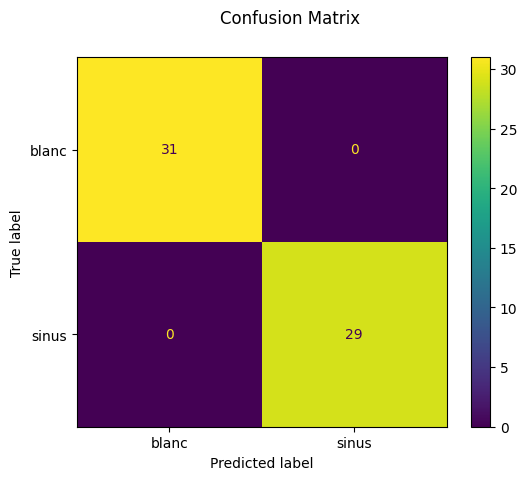

In [181]:
# Plot the confusion matrix
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predictions)
disp.figure_.suptitle("Confusion Matrix")
print(f"Matrice de confusion:\n{disp.confusion_matrix}")